In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load rankings data here:
wood = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
print(wood.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


In [3]:
steel = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
print(steel.head())
print(sorted(steel.Rank.unique()))

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [4]:
steel['Name'] = steel['Name'].replace(["Superman: The Ride"], "Superman The Ride")
print(steel[steel["Name"].str.contains("Superman")][["Name", "Park", "Year of Rank"]])

                       Name                   Park  Year of Rank
32        Superman The Ride  Six Flags New England          2016
82        Superman The Ride  Six Flags New England          2017
134       Superman The Ride  Six Flags New England          2018
169  Superman Ride of Steel      Six Flags America          2018


In [65]:
roller_dict = {"wood": wood, "steel": steel}

2

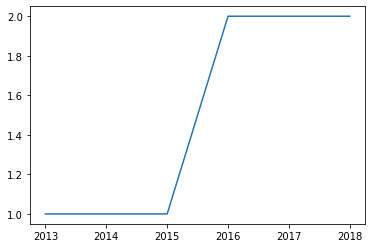

In [67]:
def plot_roller(db_name, roller_name, roller_park):
    rankings = roller_dict[db_name][
        (roller_dict[db_name].Name == roller_name) & (roller_dict[db_name].Park == roller_park)].sort_values(by="Year of Rank")
    plt.plot(rankings["Year of Rank"], rankings["Rank"])
    return max(rankings["Rank"])
    
plot_roller("steel", "Millennium Force", "Cedar Point")

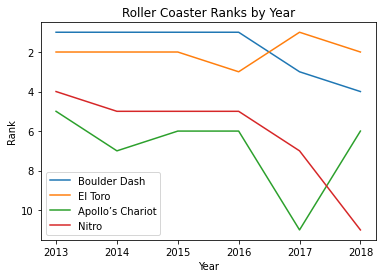

<Figure size 432x288 with 0 Axes>

In [105]:
def plot_multi_rollers(*rollers, title="Roller Coaster Ranks by Year"):
    ax = plt.subplot()
    ax.invert_yaxis()
    roller_names = []
    bottom = 0
    for db, name, park in rollers:
        new_bottom = plot_roller(db, name, park)
        roller_names.append(name)
        bottom = new_bottom if new_bottom > bottom else bottom
    interval = [1, 1] if bottom <= 10 else [2, 2]
    yticks = list(range(interval[0], bottom + 1, interval[1]))
    ax.set_yticks(yticks)
    plt.legend(roller_names)
    plt.ylabel("Rank")
    plt.xlabel("Year")
    plt.title(title)
    plt.show()
    plt.clf()
        
plot_multi_rollers(["wood", "Boulder Dash", "Lake Compounce"],
                       ["wood", "El Toro", "Six Flags Great Adventure"],
                       ["steel", "Apollo’s Chariot", "Busch Gardens Williamsburg"], 
                       ["steel", "Nitro", "Six Flags Great Adventure"])

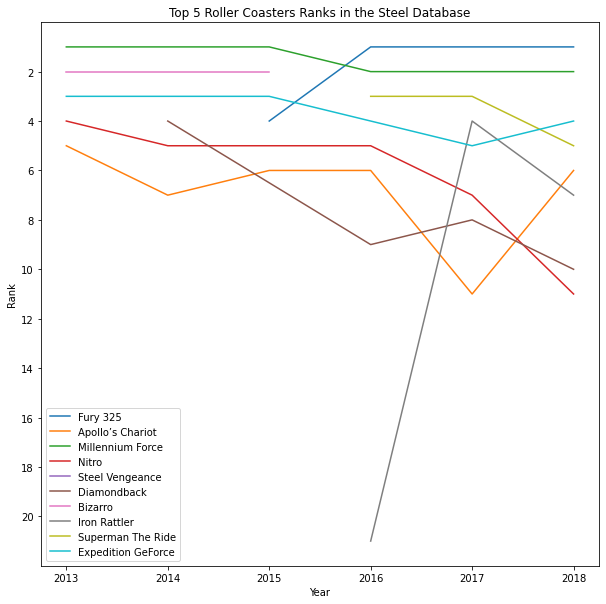

<Figure size 432x288 with 0 Axes>

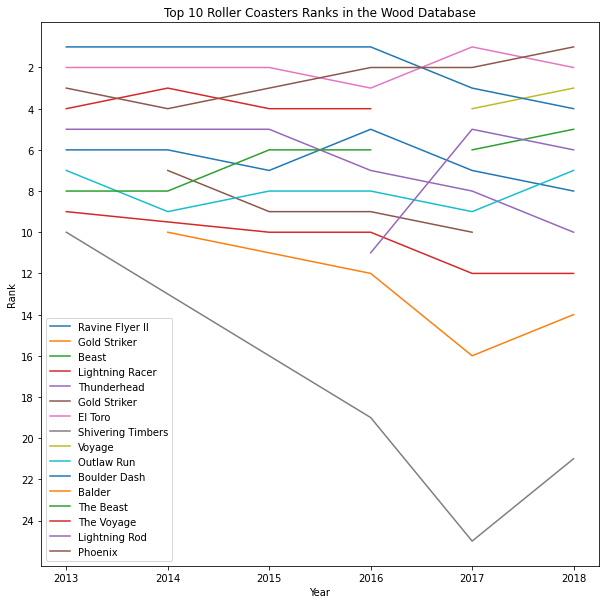

<Figure size 432x288 with 0 Axes>

In [108]:
def top_ranked_coasters(df_name, n):
    top_rollers = []
    top_ranked_coasters = roller_dict[df_name][roller_dict[df_name].Rank <= n]
    names_parks = set()
    for index, rows in top_ranked_coasters.iterrows():
        entry = (rows.Name, rows.Park)
        names_parks.add(entry)
    unpacked_rollers = [[df_name, name, park] for (name, park) in names_parks]
    plt.figure(figsize=(10, 10))
    plot_multi_rollers(*unpacked_rollers, title=f"Top {n} Roller Coasters Ranks in the {df_name.capitalize()} Database")

top_ranked_coasters("steel", 5)
top_ranked_coasters("wood", 10)

In [109]:
all_rollers = pd.read_csv("roller_coasters.csv")

In [110]:
print(all_rollers.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


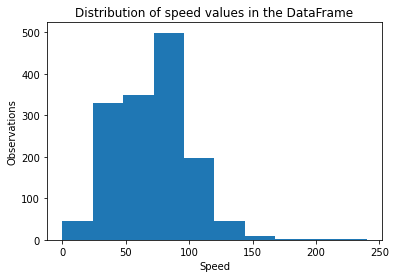

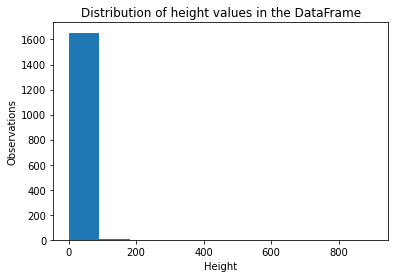

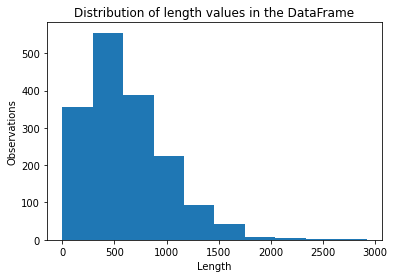

<Figure size 432x288 with 0 Axes>

In [120]:
def histo_column(df_name, column_name):
    plt.hist(df_name[column_name])
    plt.title(f"Distribution of {column_name} values in the DataFrame")
    plt.ylabel("Observations")
    plt.xlabel(f"{column_name.capitalize()}")
    plt.show()
    plt.clf()
    
histo_column(all_rollers, "speed")
histo_column(all_rollers, "height")
histo_column(all_rollers, "length")

In [145]:
print(all_rollers.groupby("park").name.count().sort_values(ascending=False))

park
Foire                         121
Six Flags Magic Mountain       24
Kings Island                   23
Cedar Point                    22
Canada's Wonderland            18
                             ... 
Ile des Loisirs d'Etampes       1
Domaine des Planards            1
Quanzhou Amusement Park         1
Ilyicha Park                    1
Shaoxing Jinghu Theme Park      0
Name: name, Length: 718, dtype: int64


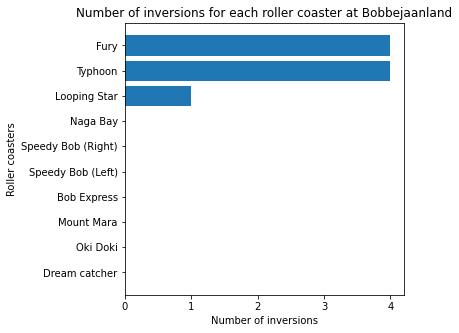

<Figure size 432x288 with 0 Axes>

In [210]:
def bar_chart_inversions(df_name, park_name):
    park_df = df_name[df_name.park == park_name].sort_values(by="num_inversions")
    xticks = list(range(0, int(max(park_df.num_inversions)) + 1, 1))
    size = (len(park_df.name) / 10) * 5
    plt.figure(figsize=(size, size))
    ax = plt.subplot()
    plt.barh(park_df.name, park_df.num_inversions)
    plt.title(f"Number of inversions for each roller coaster at {park_name}")
    ax.set_xticks(xticks)
    plt.ylabel("Roller coasters")
    plt.xlabel("Number of inversions")
    plt.show()
    plt.clf()

bar_chart_inversions(all_rollers, "Bobbejaanland")

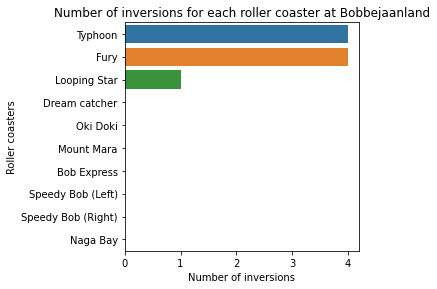

<Figure size 432x288 with 0 Axes>

In [208]:
def bar_chart_inversions(df_name, park_name):
    park_df = df_name[df_name.park == park_name].sort_values(by="num_inversions", ascending=False)
    xticks = list(range(0, int(max(park_df.num_inversions)) + 1, 1))
    size = (len(park_df.name) / 10) * 4.2
    plt.figure(figsize=(size, size))
    ax = plt.subplot()
    sns.barplot(y = park_df.name, x = park_df.num_inversions, orient = "h")
    plt.title(f"Number of inversions for each roller coaster at {park_name}")
    ax.set_xticks(xticks)
    plt.ylabel("Roller coasters")
    plt.xlabel("Number of inversions")
    plt.show()
    plt.clf()

bar_chart_inversions(all_rollers, "Bobbejaanland")

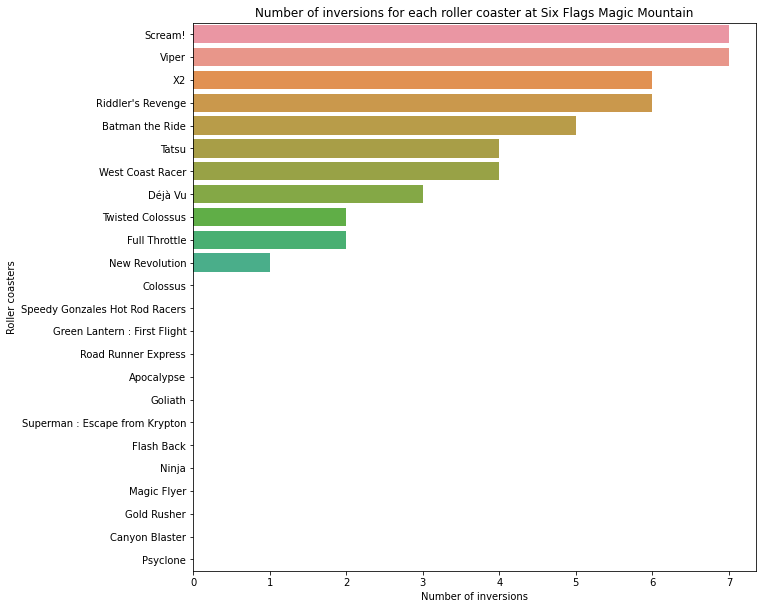

<Figure size 432x288 with 0 Axes>

In [207]:
bar_chart_inversions(all_rollers, "Six Flags Magic Mountain")

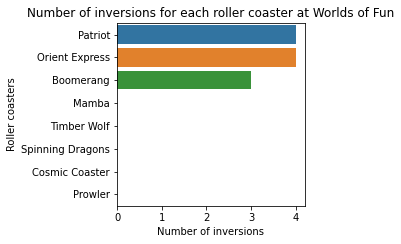

<Figure size 432x288 with 0 Axes>

In [209]:
bar_chart_inversions(all_rollers, "Worlds of Fun")

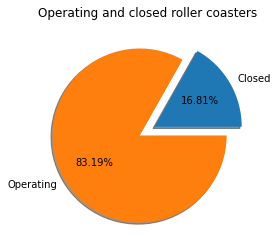

<Figure size 432x288 with 0 Axes>

In [199]:
def pie_operating(df_name):
    plt.title("Operating and closed roller coasters")
    plt.pie(df_name.groupby("status").name.count()[["status.closed.definitely", "status.operating"]].values,
           labels = ["Closed", "Operating"],
            normalize = True,
            autopct = "%.2f%%",
            shadow = True,
            explode = [0.1, 0.1]
           )
    plt.show()
    plt.clf()
    print()
    
pie_operating(all_rollers)

In [211]:
print(all_rollers.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


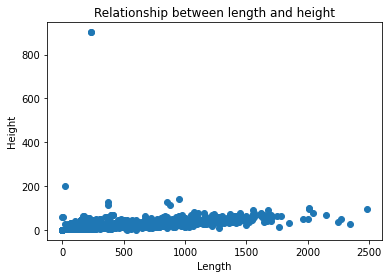

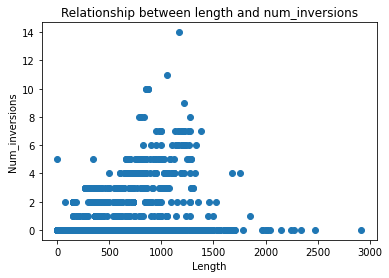

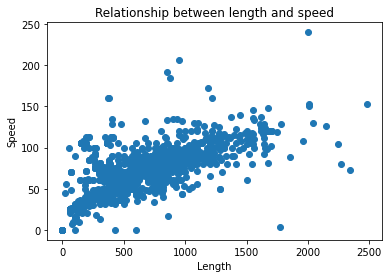

<Figure size 432x288 with 0 Axes>

In [218]:
def scatter_two_values(df_name, column_name_1, column_name_2):
    plt.scatter(x=df_name[column_name_1], y=df_name[column_name_2])
    plt.title(f"Relationship between {column_name_1} and {column_name_2}")
    plt.xlabel(f"{column_name_1.capitalize()}")
    plt.ylabel(f"{column_name_2.capitalize()}")
    plt.show()
    plt.clf()
    
scatter_two_values(all_rollers, "length", "height")
scatter_two_values(all_rollers, "length", "num_inversions")
scatter_two_values(all_rollers, "length", "speed")

In [221]:
print(all_rollers.head())
print(all_rollers.seating_type.unique())
print(all_rollers.num_inversions.unique())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  
['Sit Down' 'Suspended' 'Inverted' 'Spinning' 'Water Coaster' 'Floorless'
 'Bobsleigh' 'Stand Up' 'Flying' '4th Dimension' 'Pipeline' 'Motorbike'
 'Wing'

seating_type
Sit Down         2214
Spinning          150
Inverted          122
Suspended          55
Alpine             43
Other              40
Water Coaster      29
Floorless          27
Flying             27
Motorbike          21
Stand Up           20
4th Dimension      18
Wing               17
Bobsleigh          11
Pipeline            5
Name: name, dtype: int64


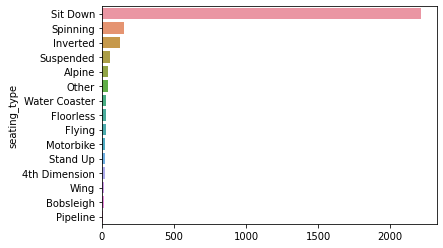

<Figure size 432x288 with 0 Axes>

In [240]:
def cat_feature_bar(df_name, feature):
    print(df_name.groupby(feature).name.count().rename(index={'na': "Other"}).sort_values(ascending=False))
    values = df_name.groupby(feature).name.count().rename(index={'na': "Other"}).sort_values(ascending=False).values
    names = df_name.groupby(feature).name.count().rename(index={'na': "Other"}).sort_values(ascending=False).index
    sns.barplot(x = values, y = names, orient = "h")
    plt.show()
    plt.clf()

cat_feature_bar(all_rollers, "seating_type")